In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "market-segmentation-in-insurance-unsupervised"

# Project on Market Segmentation in Insurance Unsupervised
## Problem
This project involves using unsupervised learning, specifically the K-means clustering algorithm, to develop customer segmentation. The goal is to identify target customer groups to provide tailored recommendations, such as saving plans, loans, and wealth management services.

## Data
The data was sourced from kaggle:https://www.kaggle.com/datasets/jillanisofttech/market-segmentation-in-insurance-unsupervised

Here is the data description:
The sample Dataset summarizes the usage behavior of about 9000 active credit cardholders during the last 6 months. The file is at a customer level with 18 behavioral variables.
Variables of Dataset:
Balance

Balance Frequency

Purchases

One-off Purchases

Installment Purchases

Cash Advance

Purchases Frequency

One-off Purchases Frequency

Purchases Installments Frequency

Cash Advance Frequency

Cash Advance TRX

Purchases TRX

Credit Limit

Payments

Minimum Payments

PRC Full payment

Tenure

Cluster

The sample Dataset summarizes the usage behavior of about 9000 active credit cardholders during the last 6 months. The file is at a customer level with 18 behavioral variables.

In [2]:
#load libraries
packages <- c(
  "ellipse",
  "mclust",
  "cluster",
  "ca",
  "readr",
  "tidymodels",
  "lubridate"
)

install.packages(packages)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(readr)
library(tidymodels)
library(ellipse)
library(mclust)
library(cluster)
library(ca)
library(lubridate)

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6      ✔ rsample      1.2.1 
✔ dials        1.2.1      ✔ tune         1.2.1 
✔ infer        1.0.7      ✔ workflows    1.1.4 
✔ modeldata    1.4.0      ✔ workflowsets 1.1.0 
✔ parsnip      1.2.1      ✔ yardstick    1.3.1 
✔ recipes      1.0.10     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/


Attaching package: ‘ellipse’


The following object is masked from ‘package:graphics’:

    pairs


Package 'mclust' version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘mclust’


The following object is 

## EDA(Exploratory Data Analysis)

In [4]:
##load data
url <- "https://raw.githubusercontent.com/ombatii/Market-Segmentation-in-Insurance-Unsupervised/refs/heads/main/Customer%20Data.csv"
path <- "/kaggle/input/market-segmentation-in-insurance-unsupervised/Customer Data.csv"
data <- read.csv(path)#url
head(data)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,C10001,40.90075,0.818182,95.40,0.00,95.40,0.000,0.166667,0.000000,0.083333,0.000000,0,2,1000,201.8021,139.5098,0.000000,12
2,C10002,3202.46742,0.909091,0.00,0.00,0.00,6442.945,0.000000,0.000000,0.000000,0.250000,4,0,7000,4103.0326,1072.3402,0.222222,12
3,C10003,2495.14886,1.000000,773.17,773.17,0.00,0.000,1.000000,1.000000,0.000000,0.000000,0,12,7500,622.0667,627.2848,0.000000,12
4,C10004,1666.67054,0.636364,1499.00,1499.00,0.00,205.788,0.083333,0.083333,0.000000,0.083333,1,1,7500,0.0000,NA,0.000000,12
5,C10005,817.71434,1.000000,16.00,16.00,0.00,0.000,0.083333,0.083333,0.000000,0.000000,0,1,1200,678.3348,244.7912,0.000000,12
6,C10006,1809.82875,1.000000,1333.28,0.00,1333.28,0.000,0.666667,0.000000,0.583333,0.000000,0,8,1800,1400.0578,2407.2460,0.000000,12


In [5]:
#Overview of the columns 
glimpse(data)

Rows: 8,950
Columns: 18
$ CUST_ID                          <chr> "C10001", "C10002", "C10003", "C10004…
$ BALANCE                          <dbl> 40.90075, 3202.46742, 2495.14886, 166…
$ BALANCE_FREQUENCY                <dbl> 0.818182, 0.909091, 1.000000, 0.63636…
$ PURCHASES                        <dbl> 95.40, 0.00, 773.17, 1499.00, 16.00, …
$ ONEOFF_PURCHASES                 <dbl> 0.00, 0.00, 773.17, 1499.00, 16.00, 0…
$ INSTALLMENTS_PURCHASES           <dbl> 95.40, 0.00, 0.00, 0.00, 0.00, 1333.2…
$ CASH_ADVANCE                     <dbl> 0.0000, 6442.9455, 0.0000, 205.7880, …
$ PURCHASES_FREQUENCY              <dbl> 0.166667, 0.000000, 1.000000, 0.08333…
$ ONEOFF_PURCHASES_FREQUENCY       <dbl> 0.000000, 0.000000, 1.000000, 0.08333…
$ PURCHASES_INSTALLMENTS_FREQUENCY <dbl> 0.083333, 0.000000, 0.000000, 0.00000…
$ CASH_ADVANCE_FREQUENCY           <dbl> 0.000000, 0.250000, 0.000000, 0.08333…
$ CASH_ADVANCE_TRX                 <int> 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ PURCHASES_TRX 

In [6]:
summary(data)

   CUST_ID             BALANCE        BALANCE_FREQUENCY   PURCHASES       
 Length:8950        Min.   :    0.0   Min.   :0.0000    Min.   :    0.00  
 Class :character   1st Qu.:  128.3   1st Qu.:0.8889    1st Qu.:   39.63  
 Mode  :character   Median :  873.4   Median :1.0000    Median :  361.28  
                    Mean   : 1564.5   Mean   :0.8773    Mean   : 1003.20  
                    3rd Qu.: 2054.1   3rd Qu.:1.0000    3rd Qu.: 1110.13  
                    Max.   :19043.1   Max.   :1.0000    Max.   :49039.57  
                                                                          
 ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE     PURCHASES_FREQUENCY
 Min.   :    0.0   Min.   :    0.0        Min.   :    0.0   Min.   :0.00000    
 1st Qu.:    0.0   1st Qu.:    0.0        1st Qu.:    0.0   1st Qu.:0.08333    
 Median :   38.0   Median :   89.0        Median :    0.0   Median :0.50000    
 Mean   :  592.4   Mean   :  411.1        Mean   :  978.9   Mean   :0.49035    


In [7]:
is.na(data) %>% colSums()

CUST_ID                          BALANCE 
                               0                                0 
               BALANCE_FREQUENCY                        PURCHASES 
                               0                                0 
                ONEOFF_PURCHASES           INSTALLMENTS_PURCHASES 
                               0                                0 
                    CASH_ADVANCE              PURCHASES_FREQUENCY 
                               0                                0 
      ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY 
                               0                                0 
          CASH_ADVANCE_FREQUENCY                 CASH_ADVANCE_TRX 
                               0                                0 
                   PURCHASES_TRX                     CREDIT_LIMIT 
                               0                                1 
                        PAYMENTS                 MINIMUM_PAYMENTS 
                               0                              313 
                PRC_FULL_PAYMENT                           TENURE 
                               0                                0

## Principal Components Analysis

In [8]:
selected_data <- data[, c('BALANCE', 'PAYMENTS')]
pca <- princomp(selected_data)
print(pca$loadings)


Loadings:
         Comp.1 Comp.2
BALANCE   0.373  0.928
PAYMENTS  0.928 -0.373

               Comp.1 Comp.2
SS loadings       1.0    1.0
Proportion Var    0.5    0.5
Cumulative Var    0.5    1.0


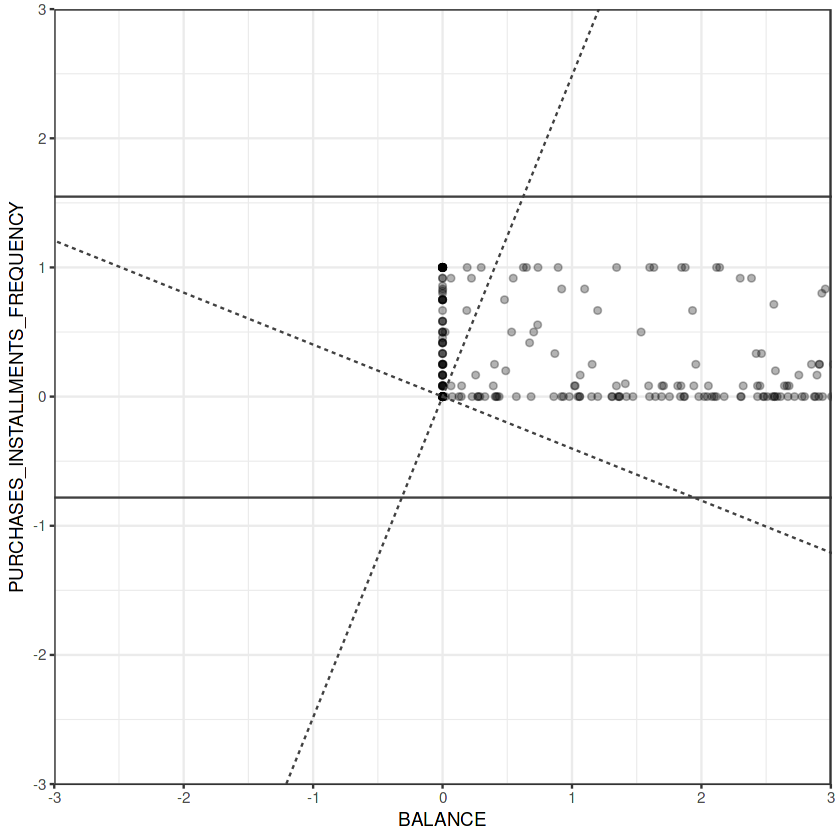

In [9]:
loadings <- pca$loadings
graph <- ggplot(data=data, aes(x=BALANCE, y=PURCHASES_INSTALLMENTS_FREQUENCY)) +
  geom_point(alpha=.3) +
  scale_shape_manual(values=c(46)) +
  stat_ellipse(type='norm', level=.99, color='grey25') +
  geom_abline(intercept = 0, slope = loadings[2,1]/loadings[1,1], color='grey25', linetype=2) +
  geom_abline(intercept = 0, slope = loadings[2,2]/loadings[1,2],  color='grey25', linetype=2) +
  scale_x_continuous(expand=c(0,0)) + 
  scale_y_continuous(expand=c(0,0)) +
  coord_cartesian(xlim=c(-3, 3), ylim=c(-3, 3)) +
  theme_bw()
graph

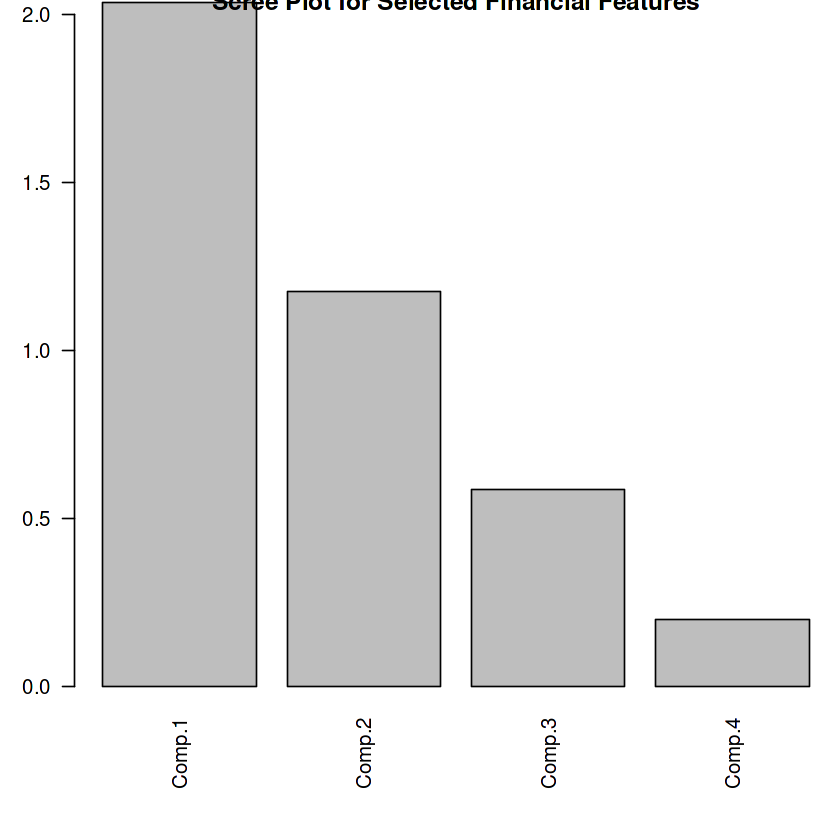

In [10]:
selected_columns <- c('BALANCE', 'PURCHASES', 'CASH_ADVANCE','PAYMENTS')
selected_data <- data[, selected_columns]
sp_pca <- princomp(selected_data, cor = TRUE) 
par(mar = c(6, 3, 0, 0) + 0.1, las = 2) 
screeplot(sp_pca, main = 'Scree Plot for Selected Financial Features')

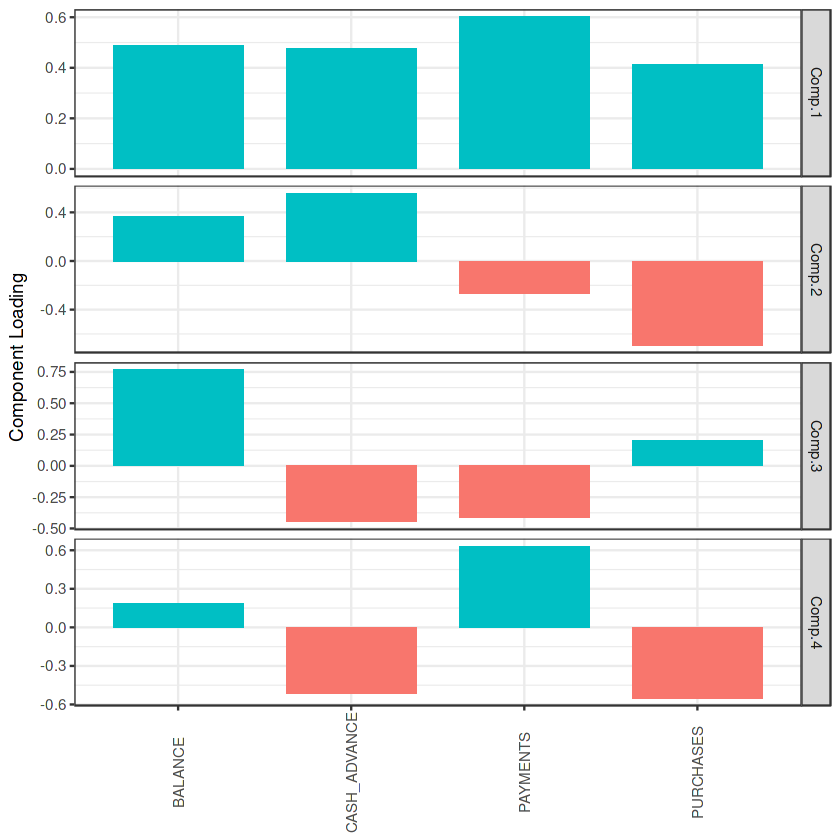

In [11]:
loadings <- sp_pca$loadings[, 1:4]
loadings <- as.data.frame(loadings)
loadings$Feature <- row.names(loadings) 
loadings <- gather(loadings, 'Component', 'Weight', -Feature)
loadings$Color <- loadings$Weight > 0

graph <- ggplot(loadings, aes(x = Feature, y = Weight, fill = Color)) +
  geom_bar(stat = 'identity', position = 'identity', width = 0.75) +
  facet_grid(Component ~ ., scales = 'free_y') +
  guides(fill = 'none') +
  ylab('Component Loading') +
  theme_bw() +
  theme(axis.title.x = element_blank(),
        axis.text.x = element_text(angle = 90, vjust = 0.5))
graph

## K-Means Clustering

In [12]:
df <- data[, c('BALANCE', 'PURCHASES')]
set.seed(10103)
km <- kmeans(df, centers = 4, nstart = 1)
data$Cluster <- factor(km$cluster)
head(data[, c('BALANCE', 'PURCHASES', 'Cluster')])

,BALANCE,PURCHASES,Cluster
,<dbl>,<dbl>,<fct>
1,40.90075,95.40,3
2,3202.46742,0.00,3
3,2495.14886,773.17,3
4,1666.67054,1499.00,3
5,817.71434,16.00,3
6,1809.82875,1333.28,3


In [13]:
centers <- data.frame(BALANCE = km$centers[, 1], PURCHASES = km$centers[, 2], Cluster = factor(1:4))
centers

,BALANCE,PURCHASES,Cluster
,<dbl>,<dbl>,<fct>
1,5771.280,856.7540,1
2,5390.390,27690.8658,2
3,832.260,586.4161,3
4,2145.405,5634.6472,4


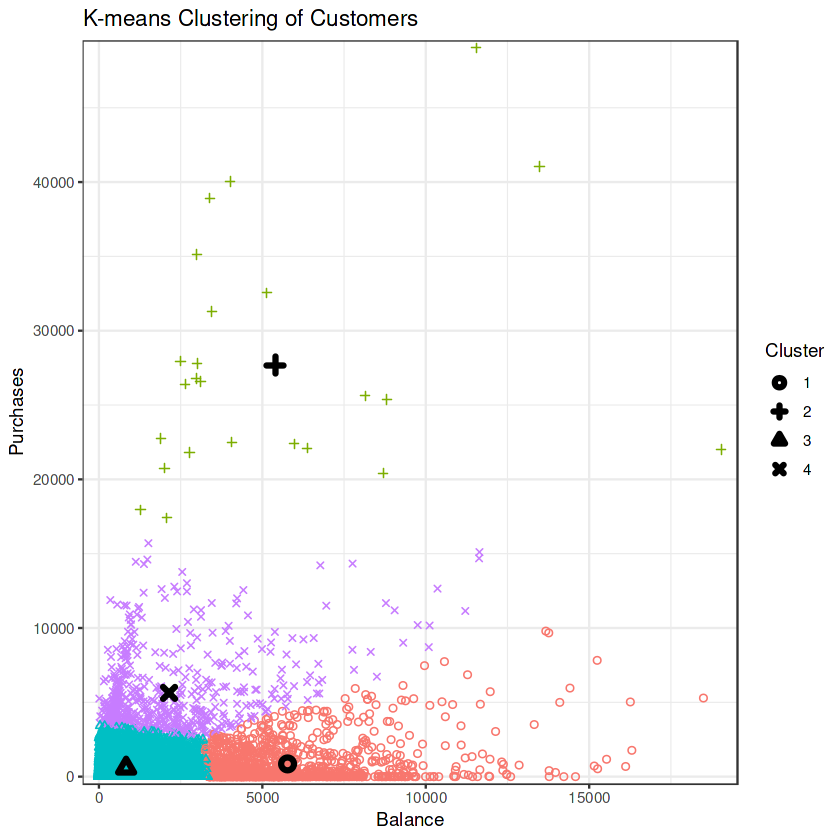

In [14]:
graph <- ggplot(data = data, aes(x = BALANCE, y = PURCHASES, color = Cluster, shape = Cluster)) +
  geom_point() +
  scale_shape_manual(values = c(1, 3, 2, 4),
                     guide = guide_legend(override.aes = aes(size = 1))) +
  geom_point(data = centers, aes(x = BALANCE, y = PURCHASES), size = 2, stroke = 2, color = 'black') +
  theme_bw() +
  scale_x_continuous(expand = c(0, 0)) + 
  scale_y_continuous(expand = c(0, 0)) +
  coord_cartesian(xlim = c(min(data$BALANCE) - 500, max(data$BALANCE) + 500), 
                            ylim = c(min(data$PURCHASES) - 500, max(data$PURCHASES) + 500)) +
  labs(x = "Balance", y = "Purchases", title = "K-means Clustering of Customers")
print(graph)

In [15]:
df <- data[, c('BALANCE', 'PURCHASES')]  
set.seed(107810)
km <- kmeans(df, centers = 5, nstart = 10)
print(km$size)

[1]  598  502   24 1763 6063


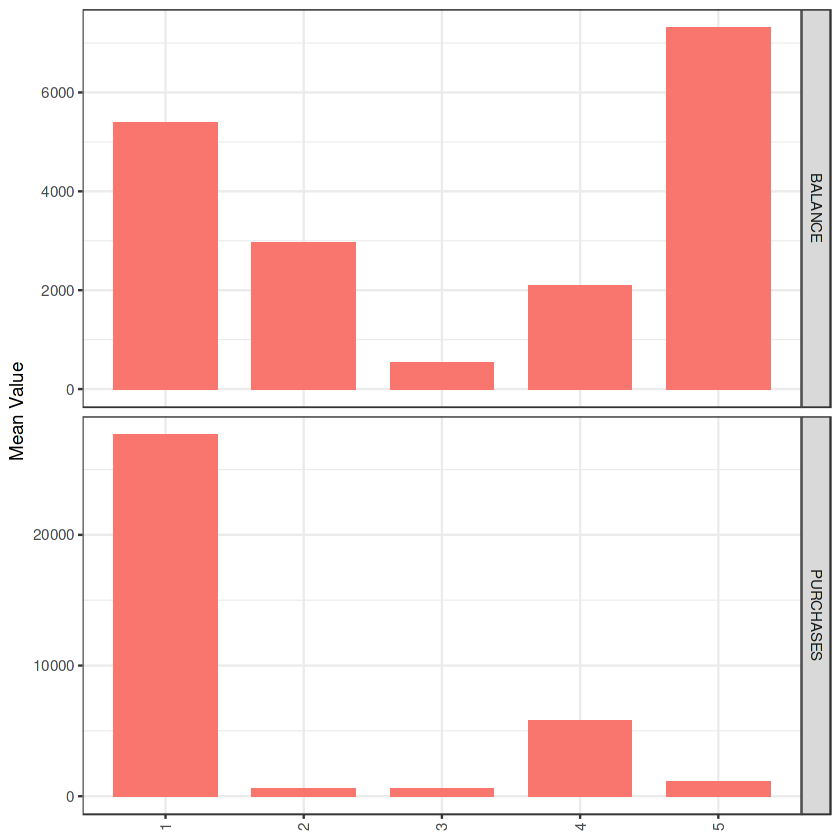

In [16]:
df <- data[, c('BALANCE', 'PURCHASES')] 
set.seed(10)

km <- kmeans(df, centers = 5, nstart = 10)


centers <- as.data.frame(km$centers)  
centers <- gather(centers, 'Cluster', 'Mean') 
centers$Symbol <- row.names(km$centers)


centers$Color <- centers$Mean > 0 

graph <- ggplot(centers, aes(x = Symbol, y = Mean, fill = Color)) +
  geom_bar(stat = 'identity', position = 'identity', width = .75) + 
  facet_grid(Cluster ~ ., scales = 'free_y') +
  guides(fill = 'none') +
  ylab('Mean Value') +
  theme_bw() +
  theme(axis.title.x = element_blank(),
        axis.text.x = element_text(angle = 90, vjust = 0.5))

graph


Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 447500)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 447500)”


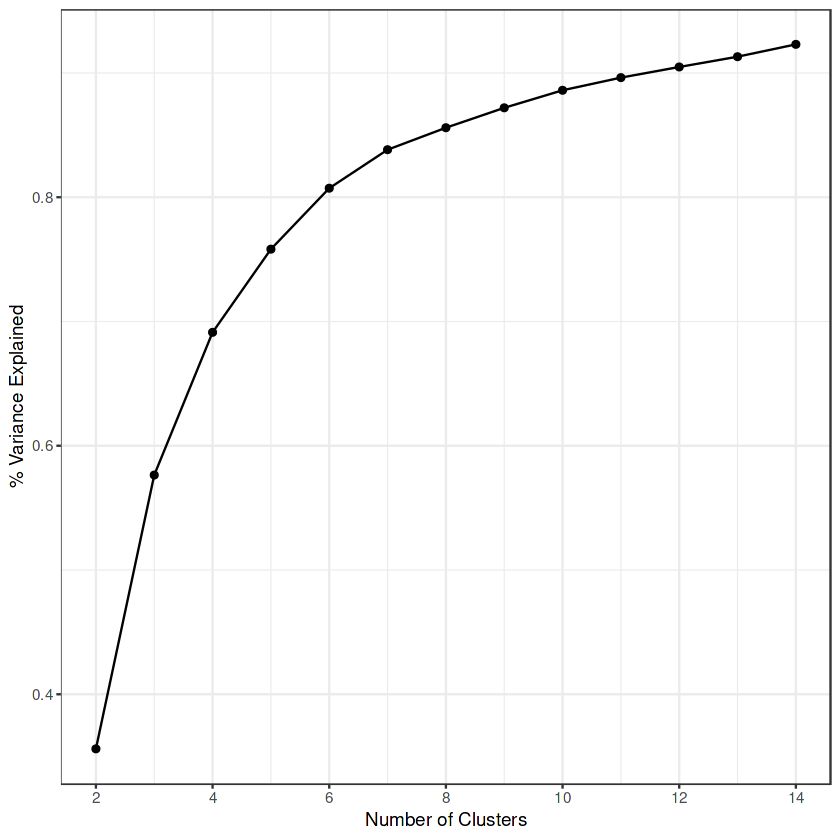

In [17]:
pct_var <- data.frame(pct_var = numeric(length = 13), 
                      num_clusters = 2:14)


totalss <- kmeans(df, centers = 14, nstart = 50, iter.max = 100)$totss


for (i in 2:14) {
  kmCluster <- kmeans(df, centers = i, nstart = 50, iter.max = 100)
  pct_var[i-1, 'pct_var'] <- kmCluster$betweenss / totalss 
}


graph <- ggplot(pct_var, aes(x = num_clusters, y = pct_var)) +
  geom_line() +
  geom_point() +
  labs(y = '% Variance Explained', x = 'Number of Clusters') +
  scale_x_continuous(breaks = seq(2, 14, by = 2)) +
  theme_bw()

graph